# Image segmentation using Expectation-Maximization

## Prerequisites

- NumPy
- Matplotlib
- SciPy

In [1]:
from matplotlib.image import imread
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from EM import EM
from extractFeature import *

## Read Image

In [2]:
%cd ./pic segmentation

D:\codes\jupyter_prj\pic segmentation


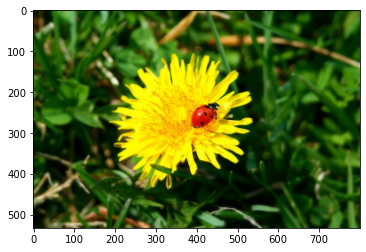

In [3]:
file = 'images/ladybug.png'
img = imread(file)
plt.imshow(img)
x,y = img.shape[:-1]

## Smoothing Image

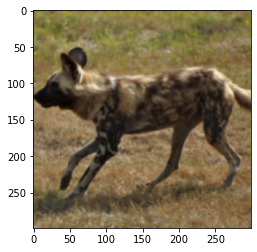

In [4]:
sigma = 1
filtered_img = gaussian_filter(img, sigma=(sigma, sigma,0))
plt.imshow(filtered_img)

## Extract Features

In [9]:
# Wenjuan's Part: find the optimal value of weight

feature = norm_and_extract_features(img,rgb_weight=0.9)

## Expectation-Maximization with Gaussian Mixture Model

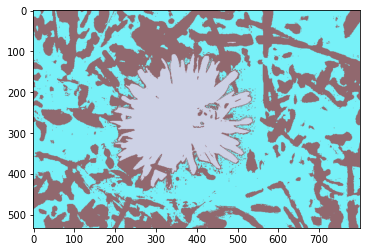

In [10]:
# feature = img.reshape(-1,3)
k = 3
em = EM(k=k, max_iter=10,init_params='kmeans')
res = em.fit(feature)

random_label_color = np.random.randint(256,size=(k,3))

# clustered_img = np.ndarray(shape=img.shape, dtype=int)

# for i in range(len(res)):
#     cluster = res[i]
#     for j in range(len(cluster)):
#         y_index = int(cluster[j] % y)
#         x_index = int((cluster[j] - y_index) / y)
#         clustered_img[x_index][y_index] = random_label_color[i]
clustered_img = random_label_color[res].reshape(img.shape)
plt.imshow(clustered_img)

In [8]:
np.unique(res)

array([0, 1])

In [66]:
reg_covar = 1e-6
# resp = np.arange(9)
resp = np.arange(81).reshape(9,9)
resp[:,2]
diff = np.arange(1,10)
feat = np.dot(resp[:,2] * diff.T, diff).astype(np.float64)
feat.flat[::10] += reg_covar
feat

16230.0

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

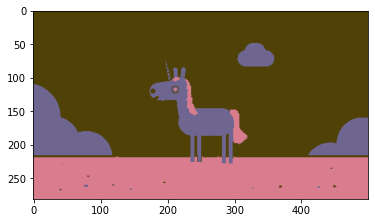

In [7]:
k=3
from cluster import kMeanCluster
kmc = kMeanCluster(k)
feature = norm_and_extract_features(img, rgb_weight= 0.7)
res = kmc.fit(feature).predict(feature)
random_label_color = np.random.randint(256,size=(k,3))
clustered_img = random_label_color[res].reshape(img.shape)
plt.imshow(clustered_img)
kmc.label_

Initialization 0
  Iteration 10	 time lapse 1.97540s	 ll change 0.00323
Initialization converged: True	 time lapse 2.44768s	 ll 3.60765


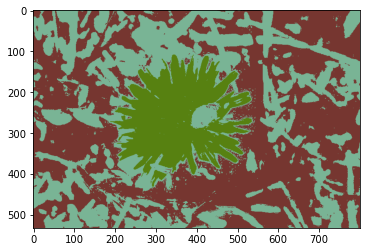

In [7]:
k = 3 # number of segmentations.

from sklearn.mixture import GaussianMixture
feature = img.reshape(-1,3)
random_label_color = np.random.randint(256,size=(k,3))
gs = GaussianMixture(n_components=k, random_state=42, verbose=2).fit(feature)
# model.predict predicts the index of aligned component for each pixel
r_pred = gs.predict(feature)
# model.means_ is the mean of the components
pic = random_label_color[r_pred]
pic = pic.reshape(img.shape)
plt.imshow(pic)